# The TxTl Toolbox in BioCRNpyler

### A recreation of the original MATLAB TxTl Toolbox, as seen in [Singhal et al. 2020](https://www.biorxiv.org/content/10.1101/2020.08.05.237990v1)

This tutorial shows how to use the EnergyTxTlExtract Mixture with a parameter file derived from the paper above. This Mixture is a simplification of the models used in the original toolbox. Notable changes include:
1. Using only a single nucleotide species NTPs (instead of GTP, ATP, UTP, and CTP)
2. A slightly different NTP regeneration Mechanism which explicitly incorporates the amount of fuel, 3PGA, put into the extract and metabolic leak of the extract.
3. Degredation of RNA bound to ribosomes (which releases the ribosome).
4. A modification of the Energy consumption reactions for Transcription and Translation so that there is only a single binding reaction.

## The CRN displayed below shows the energy utilization process model

Species(N = 7) = {
metabolite[amino_acids] (@ 30.0),  
   found_key=(mech=initial concentration, partid=None, name=amino_acids).
   search_key=(mech=initial concentration, partid=, name=amino_acids).
metabolite[Fuel_3PGA] (@ 30.0),  
   found_key=(mech=initial concentration, partid=None, name=Fuel_3PGA).
   search_key=(mech=initial concentration, partid=, name=Fuel_3PGA).
protein[RNAase] (@ 20.2),  
   found_key=(mech=initial concentration, partid=None, name=RNAase).
   search_key=(mech=initial concentration, partid=, name=RNAase).
metabolite[NTPs] (@ 5.0),  
   found_key=(mech=initial concentration, partid=None, name=NTPs).
   search_key=(mech=initial concentration, partid=, name=NTPs).
protein[Ribo] (@ 0.0273),  
   found_key=(mech=initial concentration, partid=None, name=protein_Ribo).
   search_key=(mech=initial concentration, partid=, name=protein_Ribo).
protein[RNAP] (@ 0.00933),  
   found_key=(mech=initial concentration, partid=None, name=RNAP).
   search_key=(mech=initial conc

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


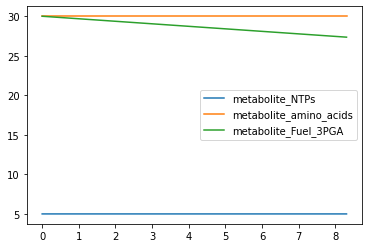

In [9]:
import numpy as np
import pylab as plt
from biocrnpyler import *

#A = DNAassembly("A", promoter = "P", rbs = "rbs")
E = EnergyTxTlExtract(parameter_file = "txtl_toolbox_parameters.txt")

CRN = E.compile_crn()

print(CRN.pretty_print())



try:
    maxtime = 30000
    timepoints = np.arange(0, maxtime, 100)
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints)
    if R is not None:
        %matplotlib inline
        plt.plot(timepoints, R[str(E.ntps.get_species())], label = E.ntps.get_species())
        plt.plot(timepoints, R[str(E.amino_acids.get_species())], label = E.amino_acids.get_species())
        plt.plot(timepoints, R[str(E.fuel.get_species())], label = E.fuel.get_species())
        plt.xticks(np.arange(0, maxtime, 3600), [str(i) for i in range(0, int(np.ceil(maxtime/3600)))])
        plt.legend()
except ModuleNotFoundError:
    print('please install the plotting libraries: pip install biocrnpyler[all]')

## Adding a DNA assembly 
This will produce protein expression, but for a limited time. The

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Species(N = 14) = {
metabolite[amino_acids] (@ 30.0),  
   found_key=(mech=initial concentration, partid=None, name=amino_acids).
   search_key=(mech=initial concentration, partid=, name=amino_acids).
metabolite[Fuel_3PGA] (@ 30.0),  
   found_key=(mech=initial concentration, partid=None, name=Fuel_3PGA).
   search_key=(mech=initial concentration, partid=, name=Fuel_3PGA).
metabolite[NTPs] (@ 5.0),  
   found_key=(mech=initial concentration, partid=None, name=NTPs).
   search_key=(mech=initial concentration, partid=, name=NTPs).
protein[Ribo] (@ 0.0273),  
   found_key=(mech=initial concentration, partid=None, name=protein_Ribo).
   search_key=(mech=initial concentration, partid=, name=protein_Ribo).
protein[RNAP] (@ 0.00933),  
   found_key=(mech=initial concentration, partid=None, name=RNAP).
   search_key=(mech=initial concentration, partid=, name=RNAP).
dna[A] (@ 1e-06),  
   found_key=(mech=initial concentration, partid=None, name=A).
   search_key=(mech=initial concentration, par

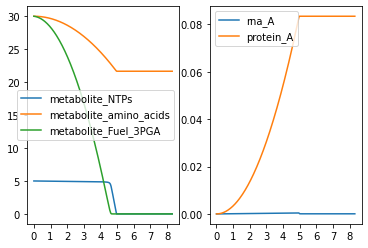

In [10]:
A = DNAassembly("A", promoter = "P", rbs = "rbs", initial_concentration = 1*10**-6)
E = EnergyTxTlExtract(components = [A], parameter_file = "txtl_toolbox_parameters.txt")

CRN = E.compile_crn()

print(CRN.pretty_print())
try:
    maxtime = 30000
    timepoints = np.arange(0, maxtime, 100)
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints)
    if R is not None:
        %matplotlib inline
        plt.subplot(121)
        plt.plot(timepoints, R[str(E.ntps.get_species())], label = E.ntps.get_species())
        plt.plot(timepoints, R[str(E.amino_acids.get_species())], label = E.amino_acids.get_species())
        plt.plot(timepoints, R[str(E.fuel.get_species())], label = E.fuel.get_species())
        plt.xticks(np.arange(0, maxtime, 3600), [str(i) for i in range(0, int(np.ceil(maxtime/3600)))])
        plt.legend()
        
        plt.subplot(122)
        plt.plot(timepoints, R[str(A.transcript)], label = A.transcript)
        plt.plot(timepoints, R[str(A.protein)], label = A.protein)
        plt.xticks(np.arange(0, maxtime, 3600), [str(i) for i in range(0, int(np.ceil(maxtime/3600)))])
        plt.legend()
except ModuleNotFoundError:
    print('please install the plotting libraries: pip install biocrnpyler[all]')